In [109]:
import numpy as np 
import matplotlib.pyplot as plt
import time
import sys

# TP05 Memoïsation
## Introduction
Les fonctions `fibo_iter` et `fibo_rec`  calculent la n*ième* valeur de Fibonacci en appliquant respectivement l’algorithme itératif et l’algorithme récursif.

In [13]:
def fibo_iter(n):
    """Version itérative du calcul de Fibonacci."""
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

In [152]:
def fibo_rec(n):
    """Version récursive du calcul de Fibonacci."""
    if n < 2:
        return n
    return fibo_rec(n - 1) + fibo_rec(n - 2)

1) Mesurer les temps de restitution de `fibo_iter` et `fibo_rec` pour des valeurs progressives de `n` (10, 20, 30, 35,...).

In [42]:
%time fibo_iter(100)

CPU times: user 6 μs, sys: 0 ns, total: 6 μs
Wall time: 7.39 μs


354224848179261915075

In [153]:
tic=time.time()
%time fibo_rec(40)
toc=time.time()
toc-tic

CPU times: user 10.5 s, sys: 998 μs, total: 10.5 s
Wall time: 10.5 s


10.546760320663452

## Mémoïsation
La mémoïsation est une technique qui consiste à stocker les résultats d'appels de fonctions déjà calculés afin d'éviter de les recalculer le cas échéant.

2. Sur la base de `fibo_rec`
   1. Ecrire une fonction `fibo_memo` qui utilise un dictionnaire pour stocker les différentes valeurs de fibonacci calculées lors des appels récursifs. Mesurer et comparer les temps de restitution.

In [102]:
memo={}
memo[1]=1
memo[2]=1
def fibo_memo(n):
    """Version récursive avec memoization"""
    if n in memo:
        return memo[n] 
    memo[n]=fibo_memo(n - 1) + fibo_memo(n - 2)
    return memo[n]

In [106]:
tic=time.time()
%time fibo_memo(39)
toc=time.time()
toc-tic

CPU times: user 11 μs, sys: 0 ns, total: 11 μs
Wall time: 13.6 μs


0.00023365020751953125

In [119]:
time_without_memo=[]
time_with_memo=[]
for i in range(1,41):
    tic=time.time()
    fibo_rec(i)
    toc=time.time()
    time_without_memo.append(toc-tic)
for i in range(1,41):
    memo={}
    memo[1]=1
    memo[2]=1
    tic=time.time()
    fibo_memo(i)
    toc=time.time()
    time_with_memo.append(toc-tic)

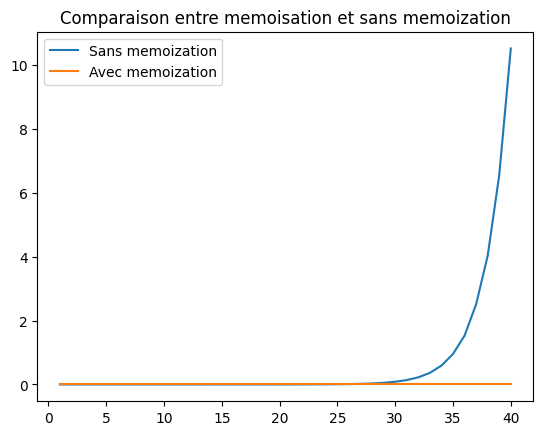

In [126]:
plt.title('Comparaison entre memoisation et sans memoization')
plt.plot([i for i in range(1,41)],time_without_memo,label='Sans memoization')
plt.plot([i for i in range(1,41)],time_with_memo,label='Avec memoization')
plt.legend()

2.
   2. Le package `functools` de python propose une solution automatique de memoïsation à l'aide du décorateur `lru_cache`. Ecrire une fonction `fibo_lru` qui utilise ce décorateur. Mesurer et comparer les temps de restitution.

In [121]:
from functools import lru_cache
@lru_cache
def fibo_lru(n):
    """Version récursive du calcul de Fibonacci."""
    if n < 2:
        return n
    return fibo_rec(n - 1) + fibo_rec(n - 2)

In [289]:
%time fibo_lru(35)

CPU times: user 4 μs, sys: 0 ns, total: 4 μs
Wall time: 5.96 μs


9227465

In [145]:
time_with_lru=[]
time_with_memo=[]
for i in range(1,40):
    tic=time.time()
    fibo_lru(i)
    toc=time.time()
    time_with_lru.append(toc-tic)
for i in range(1,40):
    memo={}
    memo[1]=1
    memo[2]=1
    tic=time.time()
    fibo_memo(i)
    toc=time.time()
    time_with_memo.append(toc-tic)

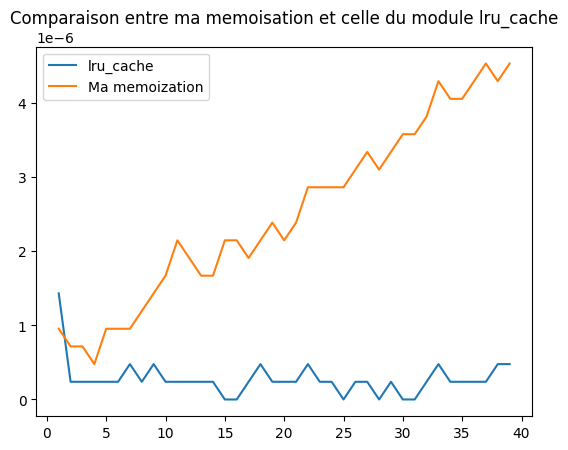

In [149]:
plt.title('Comparaison entre ma memoisation et celle du module lru_cache')
plt.plot([i for i in range(1,40)],time_with_lru,label='lru_cache')
plt.plot([i for i in range(1,40)],time_with_memo,label='Ma memoization')
plt.legend()

## Accélération avec Numba (`njit`)

3. Compilation à la volée.
   1. Utiliser le décorateur `njit` pour compiler `fibo_iter` et `fibo_rec` à la volée. Comparer les temps de restitution.
   2. tenter une version *jitté* de `fibo_memo`. Quel est le problème. Contournez le en utilisant un `ndarray` ou bien un objet de type `Dict` de `numba.typed`. Comparer les temps de restitution.

In [202]:
def fibo_iter(n):
    """Version itérative du calcul de Fibonacci."""
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

In [204]:
%time fibo_iter(1000)

CPU times: user 37 μs, sys: 0 ns, total: 37 μs
Wall time: 39.1 μs


43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

In [231]:
from numba import njit
@njit
def fibo_iter_njit(n):
    """Version itérative du calcul de Fibonacci."""
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

In [233]:
%time fibo_iter_njit(1000)

CPU times: user 6 μs, sys: 0 ns, total: 6 μs
Wall time: 7.87 μs


817770325994397771

In [252]:
@njit
def fibo_rec_njit(n):
    """Version récursive du calcul de Fibonacci."""
    if n < 2:
        return n
    return fibo_rec_njit(n - 1) + fibo_rec_njit(n - 2)

In [235]:
def fibo_rec(n):
    """Version récursive du calcul de Fibonacci."""
    if n < 2:
        return n
    return fibo_rec(n - 1) + fibo_rec(n - 2)

In [257]:
recur_nojit=[]
recur_with_jit=[]
for i in range(1,30):
    tic=time.time()
    fibo_rec(i)
    toc=time.time()
    recur_nojit.append(toc-tic)
for i in range(1,30):
    tic=time.time()
    fibo_rec_njit(i)
    toc=time.time()
    recur_with_jit.append(toc-tic)

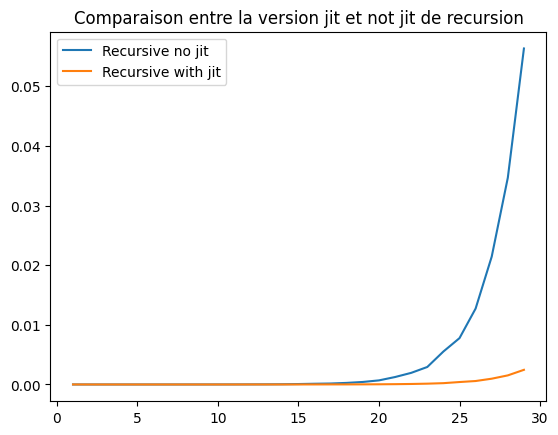

In [259]:
plt.title('Comparaison entre la version jit et not jit de recursion')
plt.plot([i for i in range(1,30)],recur_nojit,label='Recursive no jit')
plt.plot([i for i in range(1,30)],recur_with_jit,label='Recursive with jit')
plt.legend()

In [315]:
def fibo_memo(n):
    """Version récursive avec memoization"""
    if n in memo:
        return memo[n] 
    memo[n]=fibo_memo(n - 1) + fibo_memo(n - 2)
    return memo[n]

In [316]:
from numba.typed import Dict
from numba import int32
memo=Dict.empty(key_type=int32,value_type=int32)
memo[1]=1
memo[2]=1
@njit
def fibo_memo_njit(n,memo):
    """Version récursive avec memoization"""
    if n in memo:
        return memo[n] 
    memo[n]=fibo_memo_njit(n - 1,memo) + fibo_memo_njit(n - 2,memo)
    return memo[n]

In [297]:
memo={}
memo[1]=1
memo[2]=1
fibo_memo(45)

1134903170

In [298]:
memo=Dict.empty(key_type=int32,value_type=int32)
memo[1]=1
memo[2]=1
fibo_memo_njit(45,memo)

1134903170

In [324]:
recur_nojit=[]
recur_with_jit=[]
for i in range(1,50):
    memo={}
    memo[1]=1
    memo[2]=1
    tic=time.time()
    fibo_memo(i)
    toc=time.time()
    recur_nojit.append(toc-tic)
for i in range(1,50):
    memo=Dict.empty(key_type=int32,value_type=int32)
    memo[1]=1
    memo[2]=1
    tic=time.time()
    fibo_memo_njit(i,memo)
    toc=time.time()
    recur_with_jit.append(toc-tic)

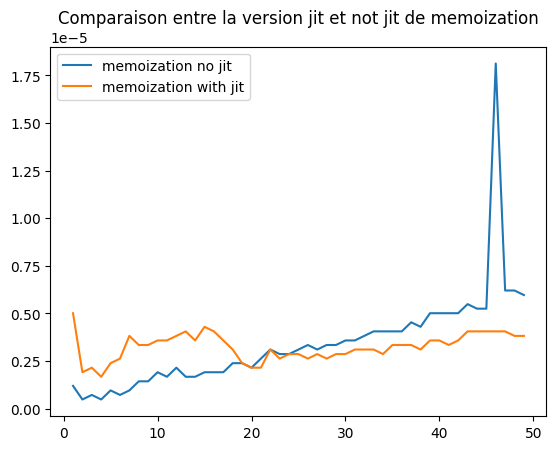

In [325]:
plt.title('Comparaison entre la version jit et not jit de memoization')
plt.plot([i for i in range(1,50)],recur_nojit,label='memoization no jit')
plt.plot([i for i in range(1,50)],recur_with_jit,label='memoization with jit')
plt.legend()

## Parallélisation multithreadée

4. Sur la base de la fonction non jitté `fibo_rec`.
   1. Ecrire une fonction récursive `fibo_thread` où chaque appel récursif est une tâche soumise à un thread d'un `ThreadPoolExecutor` via la méthode `submit`.
   2. Exécuter cette fonction pour des valeur de `n = 2, 3, 4, 5, 6, ...`. Quelles observations/problèmes ? 

In [338]:
from concurrent.futures import ThreadPoolExecutor
def fibo_thread(n):
    if n <2:
        return 1
    else:
        with ThreadPoolExecutor() as t:
            res1=t.submit(fibo_thread,n-1)
            res2=t.submit(fibo_thread,n-2)
        return res1.result()+res2.result()

In [339]:
fibo_thread(10)

89

In [291]:
tic=time.time()
n=[i for i in range(1000)]
toc=time.time()

toc-tic

0.0001366138458251953